In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats 
import string
import seaborn as sns

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
smallfs = 8
bigfs = 10

plt.rcParams.update({'font.size': bigfs, 'axes.titlesize':bigfs})
plt.rc('axes', labelsize=bigfs)    # fontsize of the x and y labels
plt.rc('legend',fontsize=smallfs)
plt.rc('xtick', labelsize=smallfs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallfs)    # fontsize of the tick labels

def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''    
    cmapIn = plt.get_cmap(cmapIn)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))
    return new_cmap

cmapRedish = truncate_colormap(cmapIn="Reds", minval=.0, maxval=.6) 

def get_ax_size(ax, fig):
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    return width, height




In [2]:
num_bins = 31

In [3]:
nus=np.array([1e-10, 0.08,0.18])
bcs=np.array([0.05,0.175,0.3])


In [4]:
#seeds=[42,420,112,110,101]
seeds=[120,4,5]#116,4,110,5]



In [5]:
ic = "uniform"
folder = "../../data/ms2_noise-in-OD/"
dam = xr.open_dataset(folder+f"model_highRes_ambiguityNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
dad = xr.open_dataset(folder+f"model_highRes_adaptationNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
dse = xr.open_dataset(folder+f"model_highRes_selectionNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
dex = xr.open_dataset(folder+f"model_highRes_exogenousNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


(1.9393631042542578, 1.8250432110620314) (1.9393631042542578, 1.8250432110620316)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


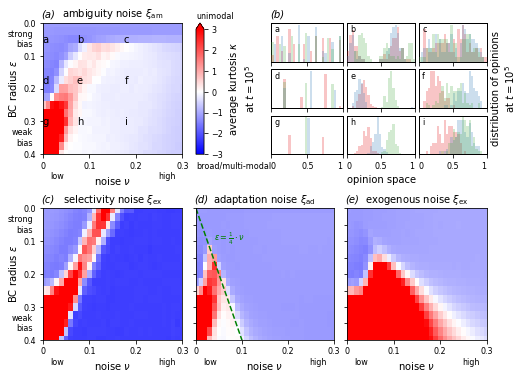

In [6]:

d=dam
t=1e5

vmax=3
vmin=-3

cmap = plt.get_cmap("bwr")#truncate_colormap(cmapIn="bwr", minval=vmin, maxval=vmax) 

contour=False


fig, axs= plt.subplot_mosaic([
    ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "a", "a", "a", "b", "b", "b", "c", "c", "c"], 
    ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "d", "d", "d", "e", "e", "e", "f", "f", "f"], 
    ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "g", "g", "g", "h", "h", "h", "i", "i", "i"], 
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    ["1", "1", "1", "1", "1", "1", ".", "2", "2", "2", "2", "2", "2", ".", "3", "3", "3", "3", "3", "3"], 
    ["1", "1", "1", "1", "1", "1", ".", "2", "2", "2", "2", "2", "2", ".", "3", "3", "3", "3", "3", "3"], 
    ["1", "1", "1", "1", "1", "1", ".", "2", "2", "2", "2", "2", "2", ".", "3", "3", "3", "3", "3", "3"]], 
    gridspec_kw={"height_ratios":[1,1,1,1,1,1,1], "width_ratios":
    [1, 1, 1, 1, 1, 1, 0.3, 0.4,1.5, 1, 0.1, 1, 1.9, 0.3, 1, 1, 1, 1, 1, 1]}
)
_kurtosis = lambda x, axis: stats.kurtosis(x, axis=axis, fisher=True)  # fisher=True means that normal distribution has kurt=0
a = d.sel({"t":t}).reduce(_kurtosis, dim="id").mean(dim="seed").x
time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
cbarlabel = r"average kurtosis"+r" $\kappa$"+"\n"+r"at "+time
c=a.plot(ax=axs["X"], add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmap) 
#if contour:
#    a.isel({"mu":0}).plot.contour(ax=axs["X"], levels=[0.1], colors="blue")
#    axs["X"].text(0.115, 0.28, r"$\sigma<0.1$", fontsize=smallfs, color="blue", ha="right")

cb = plt.colorbar(c, cax = axs["C"], extend="max",  shrink=0.8, aspect=15)
cb.set_label(cbarlabel, size=bigfs)
cb.outline.set_edgecolor('k')
cb.ax.tick_params(labelsize=smallfs)
cb.outline.set_edgecolor('k')
axs["X"].set_xlim(0,0.3)
axs["X"].set_ylim(0.4,0.0)
axs["X"].text(1.1,1.02,r"unimodal", va="bottom", ha="left", transform = axs["X"].transAxes, fontsize=smallfs)
axs["X"].text(1.1,-0.05,r"broad/multi-modal", va="top", ha="left", transform= axs["X"].transAxes, fontsize=smallfs)
axs["X"].set_ylabel(r"BC radius $\epsilon$", fontsize=bigfs)
axs["X"].text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
axs["X"].text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
axs["X"].text(0.05, -0.17,r"low", ha="left", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
axs["X"].text(0.95, -0.17,r"high", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
axs["X"].set_yticks([0,0.1,0.2,0.3,0.4])
axs["X"].set_xticks([0.0,0.1,0.2,0.3])
axs["X"].set_xticklabels([r"0",r"0.1",r"0.2",r"0.3"], ha="center")
axs["X"].set_xlabel(r"noise $\nu$", fontsize=bigfs)
axs["X"].set_title(r"ambiguity noise $\xi_{\rm am}$", fontsize=bigfs)
axs["X"].tick_params(direction='out')
axs["X"].tick_params(bottom=True, left=True)
for sp in axs["X"].spines: axs["X"].spines[sp].set_color("k")
n=int(0); letter=["a", "b", "c", "d", "e", "f", "g", "h", "i"]
for bc in bcs:
    for nu in nus:
        ha = "left" if n==0 or n==3 or n==6 else "center"
        axs["X"].text(nu, bc, letter[n], ha=ha, va="center", fontsize=bigfs, color="k", fontdict={"weight":"normal"})#, bbox=dict(facecolor=(1,1,1,0.5), edgecolor=(0,0,0,0)))
        n+=1

xhigh=1
xlow=0
n=int(0) ; letter=["a", "b", "c", "d", "e", "f", "g", "h", "i"]
for nb, bc in enumerate(bcs):
    bc = d.bc[np.isclose(d.bc.values, bc)].values[0]
    for nnu, nu in enumerate(nus):
        nu = d.nu[np.isclose(d.nu.values, nu)].values[0]
        ax = axs[letter[n]]
        for nn, s in enumerate(seeds):
            x = d.sel({"t":t, "seed":s, "bc":bc, "nu":nu}).isel({"mu":0}).x.values
            #xgrid = np.linspace(0,1, 200)                
            #x = np.concatenate([x, np.ones(20)*1.5, np.ones(20)*(-0.5)])
            col = plt.get_cmap("Set1")(nn)
            #kde = stats.gaussian_kde(x, bw_method=max(0.001,nu/2))
            #pdf = kde.evaluate(xgrid)
            #ax.fill_between(xgrid, [0]*len(pdf), len(x)/100*pdf, alpha=0.25, color=col)
            ax.hist(x, bins=np.linspace(0,1,num_bins), color=col, alpha=0.25)
        ax.set_xticks([0,0.5,1])
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1)
            ax.spines[axis].set_color("black")
            ax.spines[axis].set_zorder(0)
        ax.set_ylim(0,)
        ax.set_xlim(xlow, xhigh)
        ax.set_yticks([])
        ax.grid(False)
        ax.set_xticklabels([])
        if nb==2:
            ax.set_xticklabels([r"  0", r"0.5", r"1  "])
            if nnu==1:
                ax.set_xlabel("opinion space", fontsize=bigfs)
        if nb==1 and nnu==2:
            ax.yaxis.set_label_position("right")
            time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
            ax.set_ylabel(r"distribution of opinions"+"\n"+r"at "+time, fontsize=bigfs, x=2)
        ax.text(0.05,0.95,letter[n], va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k")
        n+=1


for n, (d, title, ax) in enumerate(zip([dex, dse, dad], 
    [r"exogenous noise $\xi_{\rm ex}$", r"selectivity noise $\xi_{\rm ex}$", r"adaptation noise $\xi_{\rm ad}$"], 
     [axs["3"], axs["1"], axs["2"]])):
    a = d.sel({"t":t}).reduce(_kurtosis, dim="id").mean(dim="seed").x
    time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
    c=a.plot(ax=ax, add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmap) 
    if contour:
        a.isel({"mu":0}).plot.contour(ax=ax, levels=[0.1], colors="blue")
        pos = {0:(0.09, 0.38), 1:(0.068, 0.38), 2:(0.15, 0.3)}
        ax.text(pos[n][0], pos[n][1], r"$\sigma<0.1$", fontsize=smallfs, color="blue", ha="right")
    ax.set_xlim(0,0.3)
    ax.set_ylim(0.4,0.0)
    ax.set_xticks([0.0,0.1,0.2,0.3])
    ax.set_xticklabels([r"0",r"0.1",r"0.2",r"0.3"], ha="center")
    if ax==axs["1"]: 
        ax.set_yticks([0,0.1,0.2,0.3,0.4])
        ax.set_ylabel(r"BC radius $\epsilon$", fontsize=bigfs)
        ax.text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs)
        ax.text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if ax==axs["2"]:
        ax.plot(a.nu, 4*a.nu, "--", color="green")
        ax.text(0.04, 0.1, r"$\epsilon = \frac{1}{4} \cdot \nu$", fontsize=smallfs, color="green")

    ax.text(0.05, -0.17,r"low", ha="left", va="center", transform=ax.transAxes, fontsize=smallfs)
    ax.text(0.95, -0.17,r"high", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs)
    ax.set_xlabel(r"noise $\nu$", fontsize=bigfs)
    ax.set_title(title, fontsize=bigfs)
    ax.tick_params(direction='out')
    ax.tick_params(bottom=True, left=True)
    for sp in axs["X"].spines: ax.spines[sp].set_color("k")


for ax, letter in zip(["X", "1", "2", "3"], [r"a", r"c",r"d", r"e"]):
    axa = axs[ax] 
    axa.text(-0.01,1.03, r"("+letter+r")", va="bottom", ha="left", transform=axa.transAxes,  fontsize=bigfs,  fontweight="normal", style="italic")
axa = axs["a"]
axa.text(-0.01,1+.03*3, r"("+"b"+r")", va="bottom", ha="left", transform=axa.transAxes,  fontsize=bigfs,  fontweight="normal", style="italic")


fig.set_size_inches(18/2.54, 13/2.54, forward=True)
plt.subplots_adjust(left=0.08, bottom=0.09, top=0.95, right=0.95)

print(get_ax_size(ax=axs["X"],fig= fig), get_ax_size(ax=axs["1"], fig= fig))

plt.savefig("figs/compare_kurtosis_full_uniform_t100000_v3.pdf")
plt.savefig("figs/compare_kurtosis_full_uniform_t100000_v3.png", dpi=300)


In [7]:
# Plot Initial COnd
def get_inits(init):
    if init=="2G-6AM":
        def init2G(a0=0.07432029, mu0=0.34018943, sig0=0.25329727, a1=0.10308521, mu1=0.77908659, sig1=0.13464983):
            gauss = lambda x, mu, sig: 1/(sig*np.sqrt(2*np.pi)) * np.exp(-0.5 * (x-mu)**2/(sig)**2) 
            twogauss = lambda x, a0, mu0, sig0, a1, mu1, sig1: a0 * gauss(x, mu0, sig0) + a1 * gauss(x, mu1, sig1) 
            xgrid = np.linspace(0,1,1000)
            pdf = list(twogauss(xgrid, a0=a0, mu0=mu0, sig0=sig0, a1=a1, mu1=mu1, sig1=sig1))
            return xgrid, pdf
        xgrid, pdf  = init2G()
    elif init=="6G-6AM-0.10":
        sixAm = np.array([0.07,0.11,0.12,0.18,0.33,0.19])
        def init6G(sig):
            gauss = lambda x, mu, sig: 1/(sig*np.sqrt(2*np.pi)) * np.exp(-0.5 * (x-mu)**2/(sig)**2) 
            multigauss = lambda x, amp, mus, sig: np.sum( [a*gauss(x, mu, sig) for a,mu in zip(amp, mus)], axis=0) 
            xgrid = np.linspace(0,1,1000)
            segments = np.linspace(0, 1, num=len(sixAm)+1)[:len(sixAm)]
            pdf = list(multigauss(xgrid, amp= sixAm, mus = segments+np.diff(segments)[0]/2, sig=sig))
            return xgrid, pdf
        xgrid, pdf  = init6G(0.1)
    elif  init=="uniform":
        xgrid = [0,1]
        pdf = [1,1]
    elif init=="beta":
        xgrid = np.linspace(0,1,1000)
        pdf= stats.beta(4.026928199803696, 3.028342634840655, 0, 1).pdf(xgrid)
    else:
        print("error")
        return     
    return xgrid, pdf

In [8]:

def peaplot_kurtosis(d, ax):
    _kurtosis = lambda x, axis: stats.kurtosis(x, axis=axis, fisher=True)  # fisher=True means that normal distribution has kurt=0
    a = d.sel({"t":t}).reduce(_kurtosis, dim="id").mean(dim="seed").x
    time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
    cbarlabel = r"average kurtosis"+r" $\kappa$"+"\n"+r"at "+time
    c1=a.plot(ax=ax, add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmap) 
    ax.set_xlim(0,0.3)
    ax.set_ylim(0.4,0.0)
    ax.set_yticks([0,0.1,0.2,0.3,0.4])
    ax.set_xticks([0.0,0.1,0.2,0.3])
    ax.set_xticklabels([r"0",r"0.1",r"0.2",r"0.3"], ha="center")
    ax.set_xlabel(r"noise $\nu$", fontsize=bigfs)
    ax.tick_params(direction='out')
    ax.tick_params(bottom=True, left=True)
    ax.text(0.05, -0.17,r"low", ha="left", va="center", transform=ax.transAxes, fontsize=smallfs)
    ax.text(0.95, -0.17,r"high", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs)

    d = d.sel({"mu":0.5}).sel({"t":t})
    data = (
                (d.mean(dim="id").x<=threshold_win) * \
                (d.mean(dim="id").x>=threshold_win_lower)  * \
                (d.std(dim="id").x<threshold_variance) 
            ).sum(dim="seed")/len(d.seed)
    c2 = data.plot.contour(ax=ax, vmin=0.01,vmax=0.7, add_colorbar=False, cmap="viridis_r", add_labels=False, levels=8)
    ax.set_ylim(0.4,0)
    return c1, c2


In [9]:
ic = "2G-6AM"
dam6AM = xr.open_dataset(folder+f"model_highRes_ambiguityNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
dad6AM = xr.open_dataset(folder+f"model_highRes_adaptationNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
dse6AM = xr.open_dataset(folder+f"model_highRes_selectionNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
dex6AM = xr.open_dataset(folder+f"model_highRes_exogenousNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")


(1.9577271982757223, 1.8250592457722439) (1.9577271982757223, 1.8250592457722439)


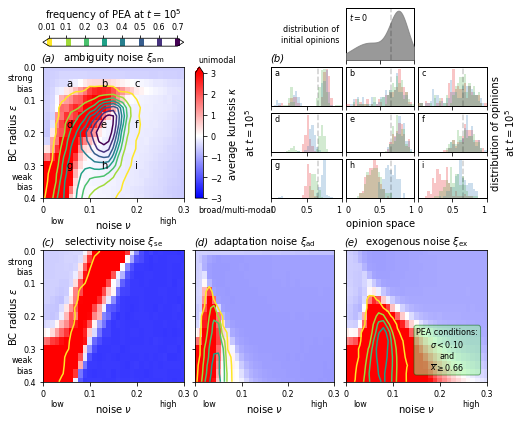

In [10]:
nus=np.array([0.05,0.13,0.20], dtype="f4")
bcs=np.array([0.05, 0.175,0.3], dtype="f4")
seeds=[4,5,6]#[110,116,112,69,42]

dam6AM["nu"] = dam6AM.nu.astype("f4"); dam6AM["bc"] = dam6AM.bc.astype("f4")
t=1e5
cmap=plt.get_cmap("Reds")(np.linspace(0., 0.8, 100))
def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''    
    cmapIn = plt.get_cmap(cmapIn)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))
    return new_cmap

vmax=3
vmin=-3
cmap = truncate_colormap(cmapIn="Reds", minval=.0, maxval=.6) 
cmap = plt.get_cmap("bwr")#truncate_colormap(cmapIn="bwr", minval=vmin, maxval=vmax) 

contour=False

threshold_win = 1.0
threshold_win_lower = 0.66
threshold_variance = 0.1


fig, axs= plt.subplot_mosaic([
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "0", "0", "0", ".", ".", "."], 
    ["p", "p", "p", "p", "p", "p", ".", ".", ".", ".", ".", ".", ".", ".", "0", "0", "0", ".", ".", "."], 
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "0", "0", "0", ".", ".", "."], 
    ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "a", "a", "a", "b", "b", "b", "c", "c", "c"], 
    ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "d", "d", "d", "e", "e", "e", "f", "f", "f"], 
    ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "g", "g", "g", "h", "h", "h", "i", "i", "i"], 
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    ["1", "1", "1", "1", "1", "1", ".", "2", "2", "2", "2", "2", "2", ".", "3", "3", "3", "3", "3", "3"], 
    ["1", "1", "1", "1", "1", "1", ".", "2", "2", "2", "2", "2", "2", ".", "3", "3", "3", "3", "3", "3"], 
    ["1", "1", "1", "1", "1", "1", ".", "2", "2", "2", "2", "2", "2", ".", "3", "3", "3", "3", "3", "3"]], 
    gridspec_kw={"height_ratios":[0.6,0.2,0.2,1,1,1,1,1,1,1], "width_ratios":
    [1, 1, 1, 1, 1, 1, 0.2, 0.4,1.5, 1, 0.1, 1, 1.9, 0.2, 1, 1, 1, 1, 1, 1]}
)


# PLOT  MAIN PANEL
c1,c2= peaplot_kurtosis(dam6AM, axs["X"])
axs["X"].set_ylim(0.4,0)
axs["X"].set_title(r"ambiguity noise $\xi_{\rm am}$", fontsize=bigfs)
axs["X"].text(1.1,1.02,r"unimodal", va="bottom", ha="left", transform = axs["X"].transAxes, fontsize=smallfs)
axs["X"].text(1.1,-0.05,r"broad/multi-modal", va="top", ha="left", transform= axs["X"].transAxes, fontsize=smallfs)
axs["X"].set_ylabel(r"BC radius $\epsilon$", fontsize=bigfs)
axs["X"].text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
axs["X"].text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
windef = r"PEA conditions:"+"\n"+r"$\sigma<$"+"{:.2f}".format(threshold_variance)+"\n"+r"and"+"\n"+r"$\overline{x}\geq$"+"{:.2f}".format(threshold_win_lower)
axs["3"].text(0.72,0.07,windef, va="bottom", ha="center", bbox=dict(boxstyle="round,pad=0.3", fc="palegreen", ec="darkgreen", lw=1, alpha=0.5), transform=axs["3"].transAxes, fontsize=smallfs)


# PLOT DISPERSION COLORBAR
cb = plt.colorbar(c1, cax = axs["C"], extend="max",  shrink=0.8, aspect=15)
time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
cbarlabel = r"average kurtosis"+r" $\kappa$"+"\n"+r"at "+time
cb.set_label(cbarlabel, size=bigfs)
cb.outline.set_edgecolor('k')
cb.ax.tick_params(labelsize=smallfs)
cb.outline.set_edgecolor('k')

# PLOT PEA COLORBAR
cax = axs["p"] 
cb = plt.colorbar(c2, cax=cax, ticks=[0.01, 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7], shrink=0.8, aspect=15, pad=0.05,  orientation = "horizontal")#, location="top")
cb.ax.set_xticklabels([r"0.01  ", r"0.1", r"0.2", r"0.3", r"0.4", r"0.5", r"0.6", r"0.7" ])  # horizontal colorbar
time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
cb.set_label(r"frequency of PEA at "+time, size=bigfs)
cb.outline.set_edgecolor('k')
childs = cb.ax.get_children()
for k in childs:
    if type(k) == mpl.collections.LineCollection:
        k.set_linewidths([5]*len(k.get_linewidths()))
cb.ax.tick_params(labelsize=smallfs)
cb.outline.set_edgecolor('k')
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_label_position("top")

# PLOT PANELS and ADD LETTERS
for sp in axs["X"].spines: axs["X"].spines[sp].set_color("k")
n=int(0); letter=["a", "b", "c", "d", "e", "f", "g", "h", "i"]
for bc in bcs:
    for nu in nus:
        ha = "left" if n==0 or n==3 or n==6 else "center"
        axs["X"].text(nu, bc, letter[n], ha=ha, va="center", fontsize=bigfs, color="k", fontdict={"weight":"normal"}) #, bbox=dict(facecolor=(1,1,1,0.5), edgecolor=(0,0,0,0)))
        n+=1
xhigh=1
xlow=0
n=int(0) 
letter=["a", "b", "c", "d", "e", "f", "g", "h", "i"]
for nb, bc in enumerate(bcs):
    for nnu, nu in enumerate(nus):
        ax = axs[letter[n]]
        for nn, s in enumerate(seeds):
            x = dam6AM.sel({"t":t, "seed":s, "bc":bc, "nu":nu}).isel({"mu":0}).x.values
            #xgrid = np.linspace(0,1, 200)                
            #x = np.concatenate([x, np.ones(20)*1.5, np.ones(20)*(-0.5)])
            col = plt.get_cmap("Set1")(nn)
            #kde = stats.gaussian_kde(x, bw_method=max(0.001,nu/2))
            #pdf = kde.evaluate(xgrid)
            #ax.fill_between(xgrid, [0]*len(pdf), len(x)/100*pdf, alpha=0.25, color=col)
            ax.hist(x, bins=np.linspace(0,1,num_bins), color=col, alpha=0.25)
        ax.set_xticks([0,0.5,1])
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1)
            ax.spines[axis].set_color("black")
            ax.spines[axis].set_zorder(0)
        ax.set_ylim(0,)
        ax.set_xlim(xlow, xhigh)
        ax.set_yticks([])
        ax.grid(False)
        ax.set_xticklabels([])
        if nb==2:
            ax.set_xticklabels([r"  0", r"0.5", r"1  "])
            if nnu==1:
                ax.set_xlabel("opinion space", fontsize=bigfs)
        if nb==1 and nnu==2:
            ax.yaxis.set_label_position("right")
            time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
            ax.set_ylabel(r"distribution of opinions"+"\n"+r"at "+time, fontsize=bigfs, x=2)
        ax.text(0.05,0.95,letter[n], va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k")
        n+=1
        ax.vlines(threshold_win_lower, ax.get_ylim()[0], ax.get_ylim()[1], linestyles="--", color="k", alpha=0.2 )


# PLOT INITIAL DISTRIBUTION
xgrid, pdf = get_inits("2G-6AM")
ax = axs["0"]
ax.fill_between(xgrid, [0]*len(pdf), len(xgrid)/100*np.array(pdf), alpha=0.8, color="grey")
ax.set_xticks([0,0.5,1])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
    ax.spines[axis].set_color("black")
    ax.spines[axis].set_zorder(0)
ax.set_ylim(0,)
ax.set_xlim(0,1)
ax.set_yticks([])
ax.grid(False)
ax.set_xticklabels([])
ax.text(0.05,0.95,r"$t=0$", va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k")
ax.text(-0.1, 0.5, r"distribution of"+"\n"+r"initial opinions", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs, color="k")
#a3 = mpl.patches.FancyArrowPatch((1.1, 0.5), (1.66, 0.), transform=ax.transAxes,
#                            connectionstyle="arc3,rad=-.5", arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color="k", clip_on = False)
#ax.add_patch(a3)
ax.vlines(threshold_win_lower, ax.get_ylim()[0], ax.get_ylim()[1], linestyles="--", color="k", alpha=0.2 )
 

# PLOT OTHER NOISES
for n, (d, title, ax) in enumerate(zip([dex6AM, dse6AM, dad6AM], 
    [r"exogenous noise $\xi_{\rm ex}$", r"selectivity noise $\xi_{\rm se}$", r"adaptation noise $\xi_{\rm ad}$"], 
    #[r"noise from external influence", r"noise from update error", r"noise from interaction error"], 
       [axs["3"], axs["1"], axs["2"]])):
    c1,c2 = peaplot_kurtosis(d, ax)
    ax.set_ylim(0.4,0)

    if ax==axs["1"]: 
        ax.set_yticks([0,0.1,0.2,0.3,0.4])
        ax.set_ylabel(r"BC radius $\epsilon$", fontsize=bigfs)
        ax.text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs)
        ax.text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=ax.transAxes, fontsize=smallfs)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    #if n==1:
    #    ax.plot(a.nu, 4*a.nu, "--", color="cyan")
    #    ax.text(0.04, 0.1, r"$\epsilon = \frac{1}{4} \cdot \nu$", fontsize=smallfs, color="cyan")
    #ax.set_xlabel(r"noise $\nu$", fontsize=bigfs)
    ax.set_title(title, fontsize=bigfs)
    ax.tick_params(direction='out')
    ax.tick_params(bottom=True, left=True)
    for sp in ax.spines: ax.spines[sp].set_color("k")


for ax, letter in zip(["X", "1", "2", "3"], [r"a", r"c",r"d", r"e"]):
    axa = axs[ax] 
    axa.text(-0.01,1.03, r"("+letter+r")", va="bottom", ha="left", transform=axa.transAxes,  fontsize=bigfs,  fontweight="normal", style="italic")
axa = axs["a"]
axa.text(-0.01,1+.03*3, r"("+"b"+r")", va="bottom", ha="left", transform=axa.transAxes,  fontsize=bigfs,  fontweight="normal", style="italic")


fig.set_size_inches(18/2.54, 7.886/7*13/2.54, forward=True)
plt.subplots_adjust(left=0.08, bottom=0.09, top=0.99, right=0.95)

print(get_ax_size(ax=axs["X"],fig= fig), get_ax_size(ax=axs["1"], fig= fig))

plt.savefig("figs/compare_kurtosis_full_2G-6AM_t100000_v3.pdf")
plt.savefig("figs/compare_kurtosis_full_2G-6AM_t100000_v3.png", dpi=300)
